In [38]:
import numpy as np
import pandas as pd
df=pd.read_csv('Train_cust.csv')
df1=pd.read_csv('Test_cust.csv')

In [39]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [40]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [41]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [42]:
df.drop(['ID'],axis=1,inplace=True)



In [43]:
df['Ever_Married'].unique()
df['Ever_Married']=df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [44]:
df['Graduated'].unique()
df['Graduated']=df['Graduated'].fillna(df['Graduated'].mode()[0])

In [45]:
df['Profession'].unique()
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])

In [46]:
df['Work_Experience'].unique()
df['Work_Experience']=df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])

In [47]:
df['Family_Size'].unique()
df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].mode()[0])

In [48]:
df['Var_1'].unique()
df['Var_1']=df['Var_1'].fillna(df['Var_1'].mode()[0])

In [49]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [50]:
df['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Gender']=lab.fit_transform(df['Gender'])
df['Ever_Married']=lab.fit_transform(df['Ever_Married'])
df['Graduated']=lab.fit_transform(df['Graduated'])
df['Profession']=lab.fit_transform(df['Profession'])
df['Spending_Score']=lab.fit_transform(df['Spending_Score'])
df['Var_1']=lab.fit_transform(df['Var_1'])



In [52]:
df.dtypes

Gender               int64
Ever_Married         int64
Age                  int64
Graduated            int64
Profession           int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1                int64
Segmentation        object
dtype: object

In [53]:
x_train=df.iloc[:,:-1].values
x_train

array([[ 1.,  0., 22., ...,  2.,  4.,  3.],
       [ 0.,  1., 38., ...,  0.,  3.,  3.],
       [ 0.,  1., 67., ...,  2.,  1.,  5.],
       ...,
       [ 0.,  0., 33., ...,  2.,  1.,  5.],
       [ 0.,  0., 27., ...,  2.,  4.,  5.],
       [ 1.,  1., 37., ...,  0.,  3.,  3.]], shape=(8068, 9))

In [54]:
y_train=df.iloc[:,-1].values
y_train

array(['D', 'A', 'B', ..., 'D', 'B', 'B'], shape=(8068,), dtype=object)

In [55]:
#testing
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [56]:
df1.drop(['ID'],axis=1,inplace=True)
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [57]:
df1.isna().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [58]:
df1['Segmentation'].value_counts()

Segmentation
A    846
D    759
B    550
C    472
Name: count, dtype: int64

In [59]:
df1['Ever_Married'].unique()
df1['Ever_Married']=df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [60]:
df1['Graduated'].unique()
df1['Graduated']=df['Graduated'].fillna(df['Graduated'].mode()[0])

In [61]:
df1['Profession'].unique()
df1['Profession']=df1['Profession'].fillna(df1['Profession'].mode()[0])

In [62]:
df1['Work_Experience'].unique()
df1['Work_Experience']=df1['Work_Experience'].fillna(df1['Work_Experience'].mode()[0])

In [63]:
df1['Family_Size'].unique()
df1['Family_Size']=df1['Family_Size'].fillna(df1['Family_Size'].mode()[0])


In [64]:
df1['Var_1'].unique()
df1['Var_1']=df1['Var_1'].fillna(df1['Var_1'].mode()[0])

In [65]:
df1.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [66]:
df1.dtypes

Gender              object
Ever_Married         int64
Age                  int64
Graduated            int64
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [67]:
df1['Gender']=lab.fit_transform(df1['Gender'])
df1['Profession']=lab.fit_transform(df1['Profession'])
df1['Spending_Score']=lab.fit_transform(df1['Spending_Score'])
df1['Var_1']=lab.fit_transform(df1['Var_1'])

In [68]:
df1.dtypes

Gender               int64
Ever_Married         int64
Age                  int64
Graduated            int64
Profession           int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1                int64
Segmentation        object
dtype: object

In [69]:
x_test=df1.iloc[:,:-1].values
x_test

array([[ 0.,  0., 36., ...,  2.,  1.,  5.],
       [ 1.,  1., 37., ...,  0.,  4.,  5.],
       [ 0.,  1., 69., ...,  2.,  1.,  5.],
       ...,
       [ 0.,  1., 53., ...,  2.,  2.,  5.],
       [ 1.,  1., 47., ...,  1.,  5.,  3.],
       [ 0.,  1., 43., ...,  2.,  3.,  6.]], shape=(2627, 9))

In [70]:
y_test=df1.iloc[:,-1].values
y_test

array(['B', 'A', 'A', ..., 'C', 'C', 'A'], shape=(2627,), dtype=object)

In [71]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [72]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['D', 'C', 'C', ..., 'B', 'C', 'D'], shape=(2627,), dtype='<U1')

In [73]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,D
1,0,1,38,1,2,1.0,0,3.0,3,A
2,0,1,67,1,2,1.0,2,1.0,5,B
3,1,1,67,1,7,0.0,1,2.0,5,B
4,0,1,40,1,3,1.0,1,6.0,5,A


In [74]:
print(model.predict(scalar.fit_transform([[0,1,67,1,2,1.0,2,1.0,5]])))

['A']


In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
score

0.37723639132089837

In [76]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[267,  60, 197, 322],
       [168,  70, 197, 115],
       [113,  54, 235,  70],
       [190,  46, 104, 419]])

In [77]:
lst=[]
for i in y_train:
    if i not in lst:
        lst.append(i)

In [78]:
lst

['D', 'A', 'B', 'C']

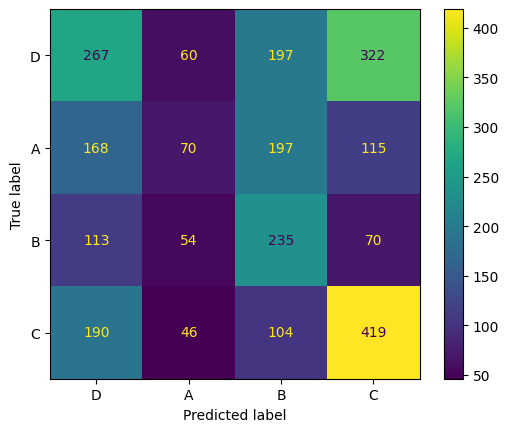

In [79]:
import matplotlib.pyplot as plt
cmd=ConfusionMatrixDisplay(cm,display_labels=lst)
cmd.plot()